In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline
from game import game, random_connection_game

In [2]:
import time
from IPython.display import clear_output

In [3]:
Memb = 400
newg = random_connection_game(9,  Memb)

In [4]:
newg.print_original()

0.00 -0.09 -0.11 0.00 -0.05 0.04 0.00 -0.06 -0.02 
-0.09 0.13 0.11 0.08 -0.07 0.00 0.00 -0.04 -0.05 
-0.11 0.11 -0.08 -0.16 0.00 -0.05 0.02 0.00 -0.02 
0.00 0.08 -0.16 0.06 -0.24 0.15 0.03 -0.04 0.00 
-0.05 -0.07 0.00 -0.24 -0.16 -0.08 0.12 -0.04 0.00 
0.04 0.00 -0.05 0.15 -0.08 0.00 0.00 0.02 -0.08 
0.00 0.00 0.02 0.03 0.12 0.00 -0.05 -0.19 0.10 
-0.06 -0.04 0.00 -0.04 -0.04 0.02 -0.19 0.10 0.05 
-0.02 -0.05 -0.02 0.00 0.00 -0.08 0.10 0.05 0.00 


In [5]:
newg.print_original()

0.00 -0.09 -0.11 0.00 -0.05 0.04 0.00 -0.06 -0.02 
-0.09 0.13 0.11 0.08 -0.07 0.00 0.00 -0.04 -0.05 
-0.11 0.11 -0.08 -0.16 0.00 -0.05 0.02 0.00 -0.02 
0.00 0.08 -0.16 0.06 -0.24 0.15 0.03 -0.04 0.00 
-0.05 -0.07 0.00 -0.24 -0.16 -0.08 0.12 -0.04 0.00 
0.04 0.00 -0.05 0.15 -0.08 0.00 0.00 0.02 -0.08 
0.00 0.00 0.02 0.03 0.12 0.00 -0.05 -0.19 0.10 
-0.06 -0.04 0.00 -0.04 -0.04 0.02 -0.19 0.10 0.05 
-0.02 -0.05 -0.02 0.00 0.00 -0.08 0.10 0.05 0.00 


In [6]:
newg.state.shape

(2, 400, 400)

In [7]:
def randomAgent(state, Memb = 25):
    move = random.randint(3)
    spin_1 = random.randint(Memb)
    spin_2 = random.randint(4)
    return (move, spin_1, spin_2)

In [8]:
from model.dqn_agent import Agent

In [9]:
from model.model import QNetwork_Conv

In [10]:
# Reset!
Memb = 6*6
statesize = Memb*Memb*1+9*9
actionsize = 3*Memb*4
randomAgent0 = lambda state: randomAgent(state, Memb)
#env = game(Hint, Memb = Memb)
smartagent0 = Agent(statesize, actionsize, seed = 1,
                    embedding_size = Memb, neighbours = 4,
                   nu = [32, 64, 128, 128, 64], model = QNetwork_Conv)

In [11]:
env = random_connection_game(9,  Memb)


In [12]:
env.state.shape

(2, 36, 36)

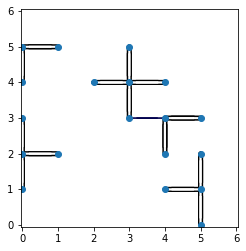

-10.25 19 (2, 19, 3) 15


In [13]:
env = random_connection_game(9,  Memb, 
                             max_consecutive_failures = 50)
env.reset()
#
state = env.state
fig, ax = env.plot()
score = 0.0
actions = []
for j in range(2000):
    clear_output(wait=True)

    action = smartagent0.act(state, eps = 1.0)
    state, reward, done =env.step(action)
    score += reward
    actions.append((*action, reward))

    fig, ax = env.plot()
    plt.show()
    print(score, env.N, action, env.terms_left)
    if done >0:
        break

In [14]:
state = env.reset()
env.nS

8

In [24]:
import torch

In [15]:
from collections import namedtuple, deque

def dqn(agent, n_episodes=2000, max_t=2000, 
        eps_start=1.0, eps_end=0.01, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            action_tr = action[0]+action[1]*3+action[2]*3*Memb
            agent.step(state, action_tr, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score, eps: {:.2f}, {:.2f}'.format(i_episode, np.mean(scores_window), eps))
        if np.mean(scores_window)>=3.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_online.state_dict(), 'checkpoint.pth')
            break
    return scores

In [16]:
scores = dqn(smartagent0, n_episodes=2000)

Episode 100	Average Score, eps: -10.54, 0.90
Episode 200	Average Score, eps: -10.26, 0.82
Episode 300	Average Score, eps: -10.35, 0.74
Episode 400	Average Score, eps: -10.56, 0.67
Episode 500	Average Score, eps: -9.98, 0.61
Episode 600	Average Score, eps: -9.77, 0.55
Episode 700	Average Score, eps: -9.13, 0.50
Episode 800	Average Score, eps: -9.71, 0.45
Episode 900	Average Score, eps: -9.60, 0.41
Episode 1000	Average Score, eps: -9.39, 0.37
Episode 1100	Average Score, eps: -9.40, 0.33
Episode 1200	Average Score, eps: -9.44, 0.30
Episode 1300	Average Score, eps: -9.28, 0.27
Episode 1400	Average Score, eps: -9.36, 0.25
Episode 1500	Average Score, eps: -9.28, 0.22
Episode 1600	Average Score, eps: -8.83, 0.20
Episode 1700	Average Score, eps: -8.55, 0.18
Episode 1800	Average Score, eps: -8.58, 0.17
Episode 1900	Average Score, eps: -8.46, 0.15
Episode 2000	Average Score, eps: -7.96, 0.14


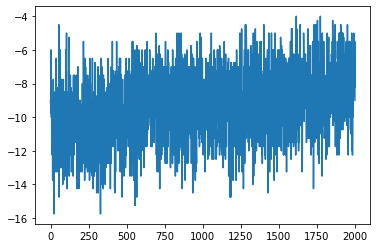

In [17]:
plt.plot(scores)

In [19]:
scores2 = dqn(smartagent0, n_episodes=2000, eps_start= 0.15)

Episode 100	Average Score, eps: -8.18, 0.14
Episode 200	Average Score, eps: -7.92, 0.12
Episode 300	Average Score, eps: -8.13, 0.11
Episode 400	Average Score, eps: -7.74, 0.10
Episode 500	Average Score, eps: -8.39, 0.09
Episode 600	Average Score, eps: -7.45, 0.08
Episode 700	Average Score, eps: -7.91, 0.07
Episode 800	Average Score, eps: -7.42, 0.07
Episode 900	Average Score, eps: -7.48, 0.06
Episode 1000	Average Score, eps: -7.00, 0.06
Episode 1100	Average Score, eps: -7.28, 0.05
Episode 1200	Average Score, eps: -7.24, 0.05
Episode 1300	Average Score, eps: -7.29, 0.04
Episode 1400	Average Score, eps: -7.42, 0.04
Episode 1500	Average Score, eps: -7.32, 0.03
Episode 1600	Average Score, eps: -6.76, 0.03
Episode 1700	Average Score, eps: -7.20, 0.03
Episode 1800	Average Score, eps: -6.57, 0.02
Episode 1900	Average Score, eps: -6.95, 0.02
Episode 2000	Average Score, eps: -7.01, 0.02


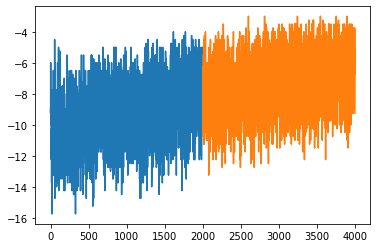

In [22]:
idx = np.arange(len(scores2))+len(scores)
plt.plot(scores)
plt.plot(idx,scores2)

In [26]:
torch.save(smartagent0.qnetwork_online.state_dict(), 'checkpoint.pth')

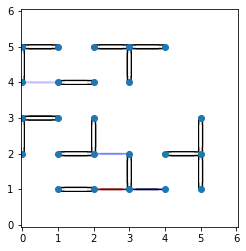

-12.25 24 (0, 14, 3) 42


In [20]:
#Memb = 6*6
env = random_connection_game(9,  Memb, 
                             max_consecutive_failures = 50)

state = env.reset()
fig, ax = env.plot()
score = 0.0
actions = []
for j in range(2000):
    clear_output(wait=True)

    action = smartagent0.act(state, eps = 1.0)
    state, reward, done =env.step(action)
    score += reward
    actions.append((*action, reward))

    fig, ax = env.plot()
    plt.show()
    print(score, env.N, action, env.terms_left)
    if done >0:
        break